In [1]:
import pandas as pd
#판다스를 가져와서 pd라고 부르기

# Pandas
- 행과 열의 구조를 가지는 데이터를 다룰 때 사용하는 라이브러리
- pandas 구조
    - Series: 1차원의 데이터 구조, 인덱스와 값으로 구성
    - Dataframe: 2차원 데이터 구조, 행과 열의 형태

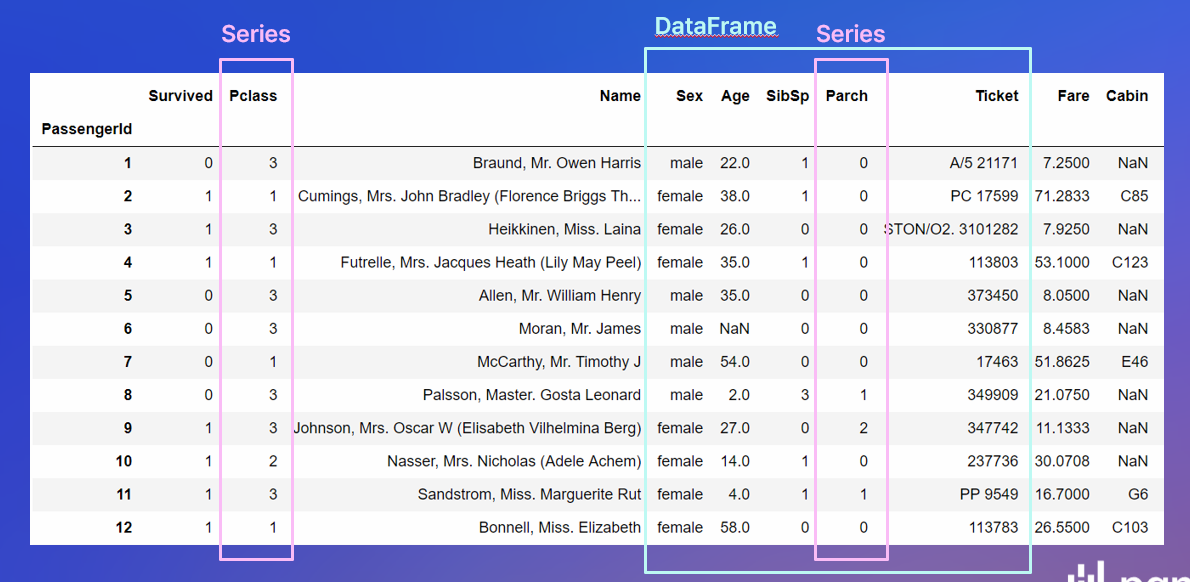

Series 생성

In [3]:
#리스트 이용 시리즈 생성
#index값을 부여해서 시리즈 생성
pd.Series(['예린','동준','관훈','승연'],index=[520,123,753,654])


520    예린
123    동준
753    관훈
654    승연
dtype: object

Series 연산

In [7]:
#딕셔너리 이용 시리즈 생성
#딕셔너리의 key값은 시리즈의 index가 되고, 딕셔너리의 value는 시리즈의 value가 된다. 
data={'칙촉': 2000, '나초칩':1700, '고래밥':1200, '치토스':1500}
snack = pd.Series(data)
snack

칙촉     2000
나초칩    1700
고래밥    1200
치토스    1500
dtype: int64

In [5]:
data2={'칙촉':2400, '고래밥':1400,'다이제':1500,'포카칩':1600}
snack2=pd.Series(data2)
snack2

칙촉     2400
고래밥    1400
다이제    1500
포카칩    1600
dtype: int64

In [9]:
#과자 가격 차이 계산
res = snack2-snack
res
#nan: 결측치(비어있는 값)/ 결측치=nan, null, na 주어가 다른 값들끼리 뺄수없음

고래밥    200.0
나초칩      NaN
다이제      NaN
치토스      NaN
칙촉     400.0
포카칩      NaN
dtype: float64

- 결측치 확인 방법

In [13]:
#결측치 확인
res.isnull()  #불리언(T/F) 자료형 출력
res[res.isnull()]

나초칩   NaN
다이제   NaN
치토스   NaN
포카칩   NaN
dtype: float64

In [14]:
#결측치 아닌 값 확인
res.notnull()

#결측치가 아닌 데이터 추출-불리언 인덱싱
res[res.notnull()]

고래밥    200.0
칙촉     400.0
dtype: float64

In [19]:
# 결측치 수정
res['다이제']=300
res

#인덱스가 없는 데이터 추가: 원래는 없었는데 추가됐음
res['콘칩']=300
res

고래밥    200.0
나초칩      NaN
다이제    300.0
치토스      NaN
칙촉     400.0
포카칩      NaN
콘칩     300.0
dtype: float64

In [23]:
# 결측치에 특정한 값으로 채우기
res.fillna(0)   #내가 원하는 값으로 채워줌, 보여는 주는데 반영이 안됨 
#아예 0값 쭉 쓰려면 변수에 대입해야함
res=res.fillna(0)
res

고래밥    200.0
나초칩      0.0
다이제    300.0
치토스      0.0
칙촉     400.0
포카칩      0.0
콘칩     300.0
dtype: float64

In [24]:
res

고래밥    200.0
나초칩      0.0
다이제    300.0
치토스      0.0
칙촉     400.0
포카칩      0.0
콘칩     300.0
dtype: float64

In [25]:
#'치토스' 삭제
del res['치토스']
res

고래밥    200.0
나초칩      0.0
다이제    300.0
칙촉     400.0
포카칩      0.0
콘칩     300.0
dtype: float64

### DataFrame 생성
- 행과 열의 2차원 데이터 구조

In [31]:
mbti = pd.DataFrame([['주현민','INFP'],
                    ['이수빈','INTP'],
                    ['박관훈','ISFP'],
                    ['김승준','ENFJ'],
                    ['김수정','ENFJ']],
                   index=['01','02','03','04','05'],
                    columns=['이름','MBTI'])
mbti
#행이 인덱스, 열이 컬럼

,이름,MBTI
01,주현민,INFP
02,이수빈,INTP
03,박관훈,ISFP
04,김승준,ENFJ
05,김수정,ENFJ


In [35]:
#행과열바꿈-Transpose
mbti.T
#변수담기
mbti=mbti.T
mbti

,01,02,03,04,05
이름,주현민,이수빈,박관훈,김승준,김수정
MBTI,INFP,INTP,ISFP,ENFJ,ENFJ


In [38]:
#딕셔너리 이용 데이터프레임 생성
# key-> columns, value-> value
data={'이름':['주현민','이수빈','박관훈','김승준','김수정'],
     'MBTI': ['INFP','INTP','ISFP','ENFJ','ENFJ']}
#데이터프레임 만드는 함수
mbti2=pd.DataFrame(data, index=['01','02','03','04','05'])
mbti2

,이름,MBTI
01,주현민,INFP
02,이수빈,INTP
03,박관훈,ISFP
04,김승준,ENFJ
05,김수정,ENFJ


- DataFrame 확인하기

In [42]:
#인덱스 정보면 출력
mbti2.index
#컬럼명 확인
mbti2.columns
#데이터확인
mbti2.values

#크기 확인
mbti2.shape

(5, 2)

### 데이터 로드: pd.read_csv()

In [44]:
#판다스에 있는 csv파일을 읽는 함수
#pd.read_csv('경로/파일명.확장자')
pd.read_csv('hr-info.csv',encoding='EUC-KR')
#UNICODEDECODEERROR-> EUC-KR(다 대문자), 혹은 CP949

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
196,E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
197,E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
198,E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.00,4500,NaN,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


In [48]:
import chardet
with open('hr-info.csv','rb') as f:   #파일 열기
    data=f.read()  #파일 읽어서 data 변수 저장

chardet.detect(data)

{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}

In [49]:
#pd.read_csv('경로/파일명.확장자')  #ID로 인덱스 정보 만들것
hr_info=pd.read_csv('hr-info.csv',encoding='EUC-KR', index_col='EID')
hr_info

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


In [50]:
#데이터에 대한 대략적인 정보 확인: info()
hr_info.info()
#컬럼과 데이터 수, 컬럼명, 데이터타입, 결측치여부 등을 파악할 수 있음

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, E00206 to E00428
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ENAME               200 non-null    object 
 1   GENDER              200 non-null    object 
 2   ORG_CD              197 non-null    object 
 3   POS_CD              200 non-null    object 
 4   AGE                 200 non-null    int64  
 5   SERVICE_YEAR        200 non-null    int64  
 6   EDU_LEVEL           200 non-null    object 
 7   PERFORMANCE_SCORE   200 non-null    float64
 8   SALARY              200 non-null    int64  
 9   LAST_PROMO_DT       182 non-null    object 
 10  TRAINING_HOURS      200 non-null    int64  
 11  SKILLS              200 non-null    object 
 12  ACTIVE_STATE        200 non-null    object 
 13  HIRE_DATE           200 non-null    object 
 14  RETIRE_DATE         49 non-null     object 
 15  RETIRE_REASON       49 non-null     object 
 16  REHIR

In [51]:
hr_info.shape

(200, 19)

In [52]:
#상위데이터 추출 디폴트 5개
hr_info.head(2)  #-> 두개만 입력
#하위데이터 추출
hr_info.tail(1) # 디폴트 5개

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00428,을충나,F,ORG003,P009,24,0,학사 학위,0.0,4500,NaN,4,"Data Analysis, Python, Marketing",Y,2024-09-01,NaN,NaN,NaN,KOREA,N


### 데이터 색인

- 열 색인

In [53]:
#데이터프레임: 행과 열의 구조 가짐
#열데이터 먼저 가져오기: 데이터 가져오려면 대괄호 사용
hr_info['ENAME'] #하나의 컬럼 추출
# series(1차원)으로 출력

EID
E00206     시이오
E00181     나사장
E00164    난부사장
E00190     판라다
E00209     누훈봉
          ... 
E00322     부탐회
E00389     초두반
E00438     권개득
E00304     탐출조
E00428     을충나
Name: ENAME, Length: 200, dtype: object

In [54]:
#리스트: 여러개 값을 하나로 묶어줌 -두개의 컬럼 추출& 두개를 하나로 묶기 위해 리스트 사용
hr_info[['ENAME','AGE']]  #-> 겉에 대괄호: 가져오기, 안에 대괄호: 리스트 작성

,ENAME,AGE
EID,,
E00206,시이오,49
E00181,나사장,49
E00164,난부사장,48
E00190,판라다,47
E00209,누훈봉,47
...,...,...
E00322,부탐회,23
E00389,초두반,23
E00438,권개득,23


- 행 색인(슬라이싱)

In [55]:
# 숫자(index번호) 사용
hr_info[1:3]

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.6,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.6,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y


In [56]:
# 문자(index값) 사용 -> 끝자리 포함하여 출력
hr_info['E00181':'E00164']

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.6,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.6,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y


- 데이터 연산

In [58]:
hr_info['SALARY']/12  #-> 급여를 알 수 있음

EID
E00206    850.000000
E00181    791.666667
E00164    758.333333
E00190    708.333333
E00209    716.666667
             ...    
E00322    375.000000
E00389    375.000000
E00438    375.000000
E00304    375.000000
E00428    375.000000
Name: SALARY, Length: 200, dtype: float64

In [59]:
#연봉이 7000이상인 직원
hr_info['SALARY']>=7000 #-> 불리언값 반환

EID
E00206     True
E00181     True
E00164     True
E00190     True
E00209     True
          ...  
E00322    False
E00389    False
E00438    False
E00304    False
E00428    False
Name: SALARY, Length: 200, dtype: bool

- 문자열 변경

In [61]:
hr_info['EDU_LEVEL']
#박사학위-> 박사(학위를 떼)

#str: 문자열 접근 함수
#문자열.replace(바꾸고싶은문자, 바꿀문자)
hr_info['EDU_LEVEL'].str.replace('학위','')

EID
E00206    박사 
E00181    박사 
E00164    박사 
E00190    박사 
E00209    박사 
         ... 
E00322    학사 
E00389    학사 
E00438    학사 
E00304    학사 
E00428    학사 
Name: EDU_LEVEL, Length: 200, dtype: object

In [64]:
hr_info['EDU_LEVEL']=hr_info['EDU_LEVEL'].str.replace('학위','')  #변수선언
hr_info

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00322,부탐회,F,ORG014,P009,23,0,학사,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00389,초두반,F,ORG012,P009,23,0,학사,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00438,권개득,M,ORG024,P009,23,0,학사,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


### 데이터프레임 실습
- 육군신체측정정보데이터 활용하여 BMI 지수 계산하기## 데이터프레임 실습
- 육군신체측정정보데이터 활용하여 BMI 지수 계산하기

In [69]:
# 파일읽어오기

#pd.read_csv('경로/파일명.확장자')
data=pd.read_csv('육군신체측정정보.csv')
data

C:\Users\231\AppData\Local\Temp\ipykernel_20380\2416790932.py:4: DtypeWarning: Columns (2,3,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('육군신체측정정보.csv')


,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,1,20140106,96.3,92.6,185.5 cm,82.5,83.8,57.1,28.5,73.2 kg
1,2,2013,101.9,83.8,167.2 cm,81.2,74.4,55.0,24.2,65.1 kg
2,3,20140106,99.5,89.6,179.9 cm,99.2,84.2,56.3,28.1,93.2 kg
3,4,2013,98.6,85.5,171.4 cm,85.9,76.4,54.5,27.4,71.6 kg
4,5,20140106,94.7,88.1,176.9 cm,78.3,79.7,58.5,26.5,67.1 kg
...,...,...,...,...,...,...,...,...,...,...
167978,167979,20170131,100.6 cm,86.4 cm,173.2 cm,86.7 cm (34.1 in),77.1 cm,56.9 cm,27.1 cm,73.7 kg
167979,167980,20170131,97.9 cm,82.7 cm,166.3 cm,90.5 cm (35.6 in),73.4 cm,61.5 cm,28.8 cm,70.7 kg
167980,167981,20170131,97.9 cm,87.2 cm,175.2 cm,94.3 cm (37.1 in),83.1 cm,57.1 cm,27.6 cm,78.7 kg
167981,167982,20170131,85.3 cm,86.8 cm,173.6 cm,75.9 cm (29.9 in),76.6 cm,57.6 cm,24.3 cm,57.4 kg


In [73]:
#인덱스 설정
data=pd.read_csv('육군신체측정정보.csv', index_col='순번', low_memory=False)
data
#정보확인
data.info

#신장 센티미터, 킬로그램만 가져오기
#1. 키 단위를 m으로 변경
#1-1 '신장 센티미터' 컬럼 가져오기

<bound method DataFrame.info of            측정 일자 가슴 둘레 센티미터 소매길이 센티미터   신장 센티미터         허리 둘레 센티미터 샅높이 센티미터  \
순번                                                                            
1       20140106       96.3      92.6  185.5 cm               82.5     83.8   
2           2013      101.9      83.8  167.2 cm               81.2     74.4   
3       20140106       99.5      89.6  179.9 cm               99.2     84.2   
4           2013       98.6      85.5  171.4 cm               85.9     76.4   
5       20140106       94.7      88.1  176.9 cm               78.3     79.7   
...          ...        ...       ...       ...                ...      ...   
167979  20170131   100.6 cm   86.4 cm  173.2 cm  86.7 cm (34.1 in)  77.1 cm   
167980  20170131    97.9 cm   82.7 cm  166.3 cm  90.5 cm (35.6 in)  73.4 cm   
167981  20170131    97.9 cm   87.2 cm  175.2 cm  94.3 cm (37.1 in)  83.1 cm   
167982  20170131    85.3 cm   86.8 cm  173.6 cm  75.9 cm (29.9 in)  76.6 cm   
167983  20170131    

In [77]:
data['신장 센티미터']
#1-2. cm삭제
height=data['신장 센티미터'].str.replace(' cm','')
height

순번
1         185.5
2         167.2
3         179.9
4         171.4
5         176.9
          ...  
167979    173.2
167980    166.3
167981    175.2
167982    173.6
167983    175.8
Name: 신장 센티미터, Length: 167983, dtype: object

In [82]:
#1-3. float으로 데이터 타입 변환
#astype(): 데이터타입 변형
height=height.astype('float64')
height

순번
1         185.5
2         167.2
3         179.9
4         171.4
5         176.9
          ...  
167979    173.2
167980    166.3
167981    175.2
167982    173.6
167983    175.8
Name: 신장 센티미터, Length: 167983, dtype: float64

In [86]:
data['몸무게 킬로그램']
#kg 삭제 후 데이터 타입 변경
weight=data['몸무게 킬로그램'].str.replace(' kg','')
weight=weight.astype('float64')
weight
#강사님풀이
# data['몸무게 킬로그램'].str.replace(' kg','').astype('float64')

순번
1         73.2
2         65.1
3         93.2
4         71.6
5         67.1
          ... 
167979    73.7
167980    70.7
167981    78.7
167982    57.4
167983    51.7
Name: 몸무게 킬로그램, Length: 167983, dtype: float64

In [89]:
#BMI 계산
weight/(height/100)**2

순번
1         2.127273e+09
2         2.328673e+09
3         2.879742e+09
4         2.437201e+09
5         2.144208e+09
              ...     
167979    2.456811e+09
167980    2.556436e+09
167981    2.563932e+09
167982    1.904638e+09
167983    1.672834e+09
Length: 167983, dtype: float64

### Boolean 색인
- 비교연산 결과가 True인 값들만 추출

In [91]:
hr_info['SALARY']>=7000
#불리언 인덱싱
hr_info[hr_info['SALARY']>=7000]

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
E00242,규모사,M,ORG027,P004,47,18,학사,2.22,8300,2024-03-01,0,"Java, Salesforce, Python",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00298,포난서,F,ORG021,P004,47,19,석사,3.63,8500,2023-03-01,47,Data Analysis,Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
E00487,고명초,F,ORG014,P004,47,20,석사,1.81,8600,2022-03-01,49,"Marketing, Salesforce, Project Management",Y,2004-03-01,NaN,NaN,NaN,Japan,Y
E00169,제언로,M,ORG004,P004,48,20,학사,3.90,8500,2022-03-01,32,"Salesforce, Data Analysis, Python",Y,2004-03-01,NaN,NaN,NaN,KOREA,Y
